In [ ]:
from time import sleep 
import csv

import pandas as pd
import numpy as np

import seaborn as sns

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
count = 0
csvreader = csv.reader(open('/content/drive/My Drive/Colab Notebooks/mcdonalds/ozocoffee.googleanalytics.webtraffic.csv','r'))
for aline in csvreader:
  count += 1
  print(aline)
  print('%s lines of data' %count)

['# ----------------------------------------']
1 lines of data
['# All Web Site Data']
2 lines of data
['# Audience Overview']
3 lines of data
['# 20190815-20200328']
4 lines of data
['# ----------------------------------------']
5 lines of data
[]
6 lines of data
['Day Index', 'Users']
7 lines of data
['8/15/19', '0']
8 lines of data
['8/16/19', '263']
9 lines of data
['8/17/19', '254']
10 lines of data
['8/18/19', '285']
11 lines of data
['8/19/19', '416']
12 lines of data
['8/20/19', '463']
13 lines of data
['8/21/19', '442']
14 lines of data
['8/22/19', '425']
15 lines of data
['8/23/19', '419']
16 lines of data
['8/24/19', '317']
17 lines of data
['8/25/19', '345']
18 lines of data
['8/26/19', '408']
19 lines of data
['8/27/19', '469']
20 lines of data
['8/28/19', '455']
21 lines of data
['8/29/19', '415']
22 lines of data
['8/30/19', '360']
23 lines of data
['8/31/19', '261']
24 lines of data
['9/1/19', '365']
25 lines of data
['9/2/19', '504']
26 lines of data
['9/3/19', '451']


In [ ]:
googleanalyticsdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mcdonalds/ozocoffee.googleanalytics.webtraffic.csv',skiprows = [0,1,2,3,4,5,234])

In [ ]:
googleanalyticsdata.tail()

,Day Index,Users
222,3/24/20,258
223,3/25/20,233
224,3/26/20,262
225,3/27/20,225
226,3/28/20,197


In [ ]:
googleanalyticsdata['Day Index'].describe()

count         227
unique        227
top       11/5/19
freq            1
Name: Day Index, dtype: object

In [ ]:
googleanalyticsdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mcdonalds/ozocoffee.googleanalytics.webtraffic.csv',skiprows = [0,1,2,3,4,5,234], parse_dates=['Day Index'], index_col='Day Index')

In [ ]:
googleanalyticsdata.tail()

,Users
Day Index,
2020-03-24,258
2020-03-25,233
2020-03-26,262
2020-03-27,225
2020-03-28,197


In [ ]:
print(googleanalyticsdata['Users'].describe())

count    227.000000
mean     389.541850
std       83.810689
min        0.000000
25%      343.500000
50%      406.000000
75%      441.500000
max      548.000000
Name: Users, dtype: float64


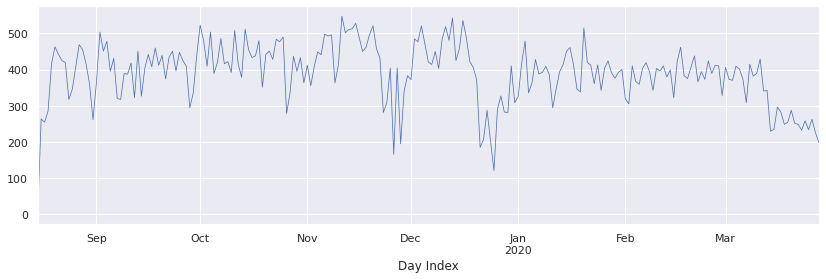

In [ ]:
pd.plotting.register_matplotlib_converters()
sns.set(rc={'figure.figsize':(14, 4)})
googleanalyticsdata['Users'].plot(linewidth=0.75)

In [ ]:
adf_test(googleanalyticsdata['Users'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.028845
p-value                          0.274071
#Lags Used                      14.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64


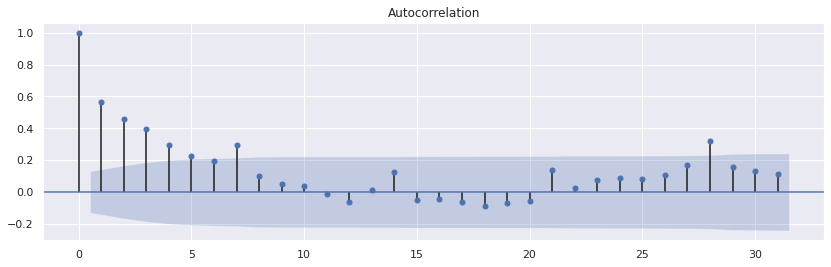

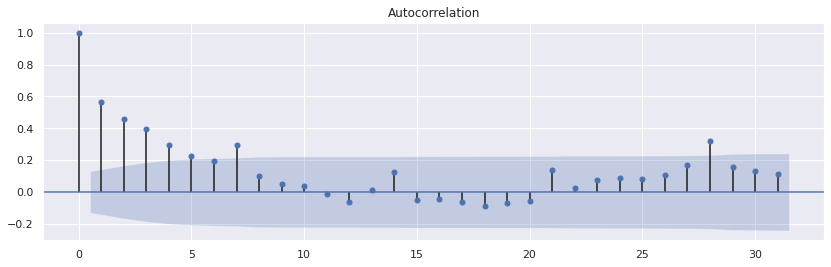

In [ ]:
plot_acf(googleanalyticsdata['Users'], lags=31)

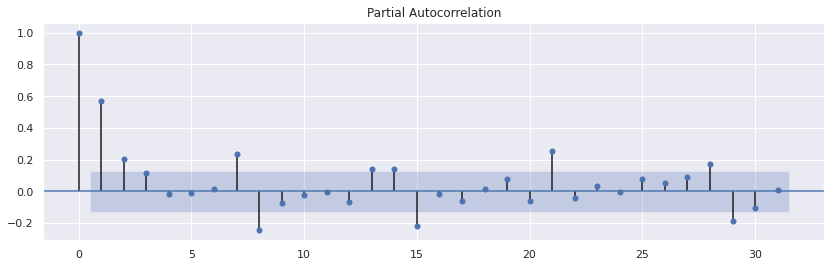

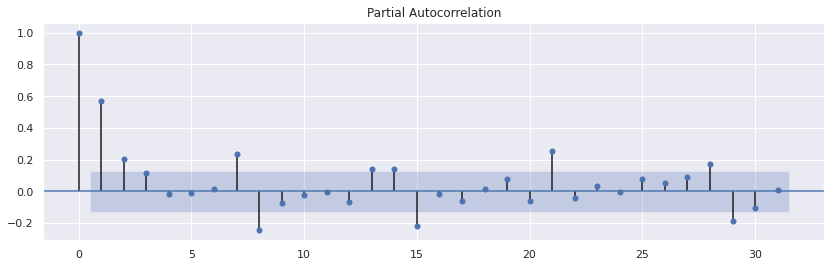

In [ ]:
plot_pacf(googleanalyticsdata['Users'], lags=31)

##ARIMA Modeling

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(googleanalyticsdata['Users'], order=(7,1,3))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Users   No. Observations:                  226
Model:                 ARIMA(7
 1
 3)   Log Likelihood               -1245.865
Method:                       css-mle   S.D. of innovations             59.700
Date:                Thu
 16 Apr 2020   AIC                           2515.730
Time:                        17:10:09   BIC                           2556.776
Sample:                    08-16-2019   HQIC                          2532.294
                         - 03-28-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4075      2.200      0.185      0.853      -3.904       4.719
ar.L1.D.Users    -1.4693      0.196     -7.480      0.000      -1.854      -1.084
ar.L2.D.Users    -1.6752      0.248     

In [ ]:
model = ARIMA(googleanalyticsdata['Users'], order=(6,1,3))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Users   No. Observations:                  226
Model:                 ARIMA(6
 1
 3)   Log Likelihood               -1251.408
Method:                       css-mle   S.D. of innovations             60.791
Date:                Thu
 16 Apr 2020   AIC                           2524.816
Time:                        17:10:12   BIC                           2562.442
Sample:                    08-16-2019   HQIC                          2540.000
                         - 03-28-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.2320      0.241     -0.963      0.337      -0.704       0.240
ar.L1.D.Users    -0.3984      0.088     -4.503      0.000      -0.572      -0.225
ar.L2.D.Users    -0.1817      0.090     

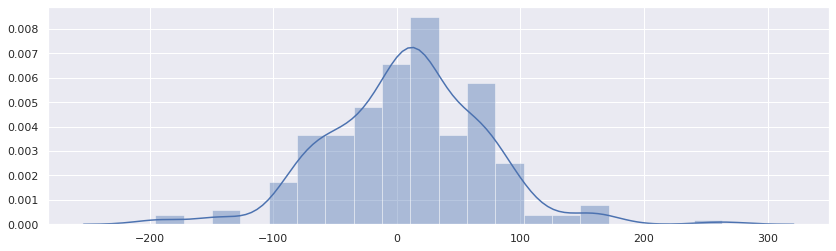

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
sns.distplot(residuals, hist=True, kde=True)

In [ ]:
from statsmodels.stats.stattools import durbin_watson
print(durbin_watson(residuals))

[1.79299327]


In [ ]:
absresiduals = abs(residuals)
print(np.mean(abs(residuals)))

0    47.602907
dtype: float64


In [ ]:
print(googleanalyticsdata['Users'].describe())

count    227.000000
mean     389.541850
std       83.810689
min        0.000000
25%      343.500000
50%      406.000000
75%      441.500000
max      548.000000
Name: Users, dtype: float64


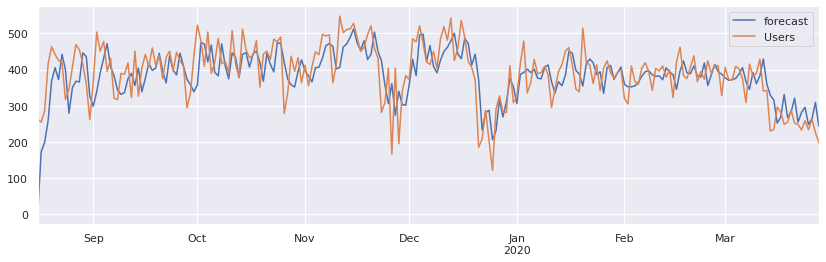

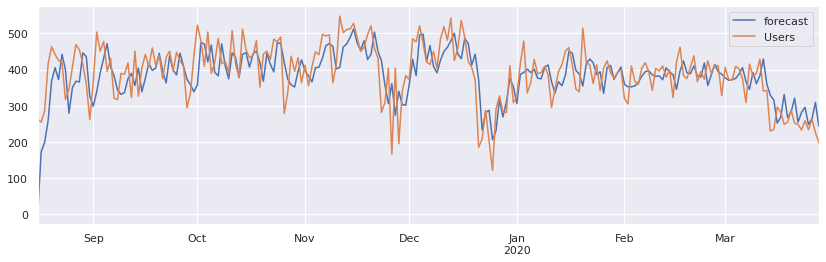

In [ ]:
pd.plotting.register_matplotlib_converters()
model_fit.plot_predict()

In [ ]:
model = ARIMA(googleanalyticsdata['Users'], order=(28,1,3))
model_fit = model.fit(disp=0)
summary = model_fit.summary().as_text()
for aline in summary.split(','):
  print(aline)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


KeyboardInterrupt: ignored

##SARMA MODELING

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', order=(7,0,3))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                           Statespace Model Results                           
Dep. Variable:                  Users   No. Observations:                  227
Model:               SARIMAX(7, 0, 3)   Log Likelihood               -1252.975
Date:                Thu, 16 Apr 2020   AIC                           2529.950
Time:                        17:10:45   BIC                           2571.049
Sample:                    08-15-2019   HQIC                          2546.534
                         - 03-28-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift          0.0079      0.186      0.042      0.966      -0.357       0.373
ar.L1         -0.3666      0.153     -2.398      0.016      -0.666      -0.067
ar.L2         -0.1851      0.081     -2.288      0.0

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', order=(7,0,3), seasonal_order=(4,0,4,7))
model_fit = model.fit(disp=False)
print(model_fit.summary())

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', seasonal_order=(1,0,1,28))
model_fit = model.fit(disp=False)
print(model_fit.summary())

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', order=(7,0,3), seasonal_order=(1,0,1,28))
model_fit = model.fit(disp=False)
print(model_fit.summary())

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', order=(7,0,0), seasonal_order=(1,0,1,28))
model_fit = model.fit(disp=False)
print(model_fit.summary())

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', order=(7,0,0), seasonal_order=(2,0,1,28))
model_fit = model.fit(disp=False)
print(model_fit.summary())

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], trend='t', order=(7,0,0), seasonal_order=(1,0,1,28))
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


                                 Statespace Model Results                                 
Dep. Variable:                              Users   No. Observations:                  227
Model:             SARIMAX(7, 0, 0)x(1, 0, 1, 28)   Log Likelihood               -1237.403
Date:                            Thu, 16 Apr 2020   AIC                           2496.806
Time:                                    17:11:01   BIC                           2534.481
Sample:                                08-15-2019   HQIC                          2512.009
                                     - 03-28-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift         -0.0026      0.019     -0.140      0.889      -0.039       0.034
ar.L1          0.5343      0.056   

In [ ]:
print(googleanalyticsdata['Users'].describe())

count    227.000000
mean     389.541850
std       83.810689
min        0.000000
25%      343.500000
50%      406.000000
75%      441.500000
max      548.000000
Name: Users, dtype: float64


In [ ]:
dir(model_fit)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cov_approx_centered',
 '_cov_approx_complex_step',
 '_cov_params_approx',
 '_cov_params_oim',
 '_cov_params_opg',
 '_cov_params_robust_approx',
 '_cov_params_robust_oim',
 '_data_attr',
 '_data_attr_model',
 '_get_robustcov_results',
 '_init_kwds',
 '_params_ar',
 '_params_seasonal_ar',
 '_params_seasonal_ma',
 '_params_trend',
 '_params_variance',
 '_rank',
 'aic',
 'arfreq',
 'arparams',
 'arroots',
 'bic',
 'bse',
 'conf_int',
 'cov_kwds',
 'cov_params',
 'cov_params_approx',
 'cov_params_default',
 'cov_params_oim',
 'cov_params_opg',
 'cov_params_robust',
 'cov_params_robust_approx',
 'cov_params_robust_

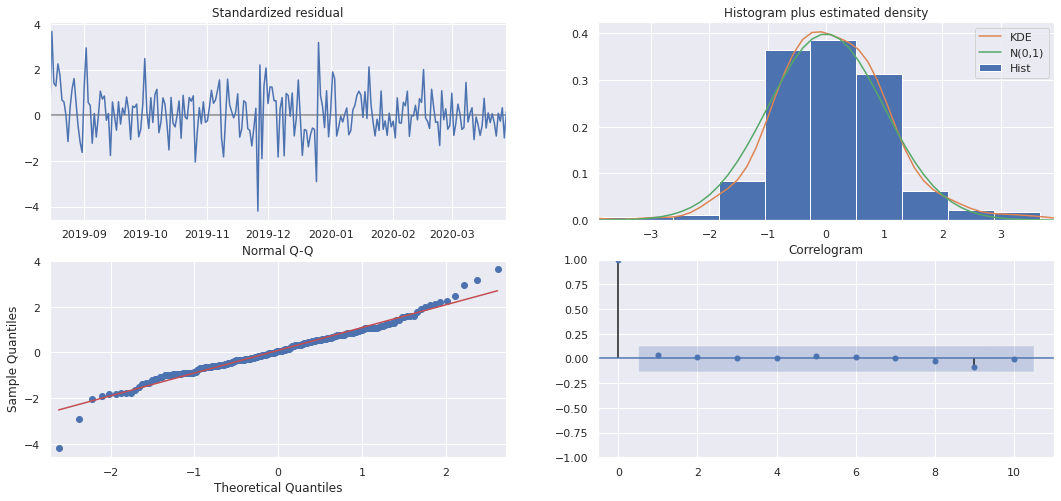

In [ ]:
model_fit.plot_diagnostics(figsize=(18, 8))
plt.show()

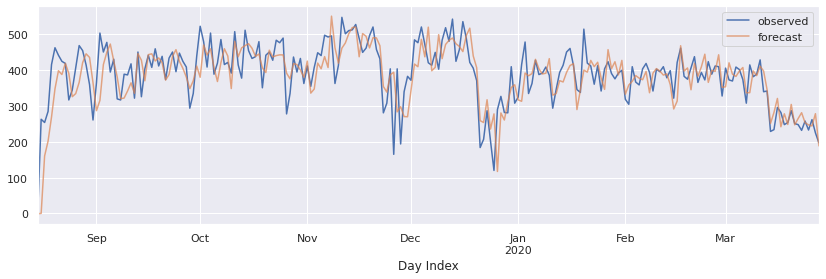

In [ ]:
pred = model_fit.get_prediction()
pred_ci = model_fit.conf_int()
ax = googleanalyticsdata['Users'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='forecast', alpha=.7, figsize=(14,4))
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

2019-08-15     -1.276331
2019-08-16     -0.034775
2019-08-17    160.625264
2019-08-18    201.982255
2019-08-19    269.428168
2019-08-20    348.161400
2019-08-21    398.761018
2019-08-22    388.028129
2019-08-23    419.447072
2019-08-24    391.026740
2019-08-25    326.094896
2019-08-26    334.839686
Freq: D, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [ ]:
googletrendsdata = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mcdonalds/googletrends_coffee_denver.csv'
, skiprows = [0,1], parse_dates=['Day'], index_col='Day')

In [ ]:
googletrendsdata.tail()

,coffee shop: (Denver CO)
Day,
2020-03-24,17
2020-03-25,9
2020-03-26,0
2020-03-27,9
2020-03-28,30


In [ ]:
googletrendsdata.columns

Index(['coffee shop: (Denver CO)'], dtype='object')

In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], 
trend='t', order=(7,0,0), seasonal_order=(1,0,1,28), exog = googletrendsdata)
model_fit = model.fit(disp=False)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                 Statespace Model Results                                 
Dep. Variable:                              Users   No. Observations:                  227
Model:             SARIMAX(7, 0, 0)x(1, 0, 1, 28)   Log Likelihood               -1266.781
Date:                            Thu, 16 Apr 2020   AIC                           2557.561
Time:                                    17:11:40   BIC                           2598.661
Sample:                                08-15-2019   HQIC                          2574.145
                                     - 03-28-2020                                         
Covariance Type:                              opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
drift                       -0.0397      0.071     -0.557      0.578      -0.179      

In [ ]:
googletrendsozo = pd.read_csv('/content/drive/My Drive/Colab Notebooks/mcdonalds/googletrends_ozocoffee_global.csv'
, skiprows = [0,1], parse_dates=['Day'], index_col='Day')

In [ ]:
googletrendsozo.head()

,ozo coffee: (Worldwide)
Day,
2019-08-15,0
2019-08-16,41
2019-08-17,45
2019-08-18,0
2019-08-19,39


In [ ]:
model = sm.tsa.statespace.SARIMAX(googleanalyticsdata['Users'], 
trend='t', exog = googletrendsozo['ozo coffee: (Worldwide)'])
model_fit = model.fit(disp=False)
print(model_fit.summary())

                           Statespace Model Results                           
Dep. Variable:                  Users   No. Observations:                  227
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1297.242
Date:                Thu, 16 Apr 2020   AIC                           2602.484
Time:                        17:11:48   BIC                           2616.184
Sample:                    08-15-2019   HQIC                          2608.012
                         - 03-28-2020                                         
Covariance Type:                  opg                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
drift                      -0.0107      0.043     -0.248      0.804      -0.096       0.074
ozo coffee: (Worldwide)     0.1296      0.177      0.733      0.464      -0.217       0.476


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


##NN MODEL WITH SEASONAL FEATURES


In [ ]:
from fastai.tabular import add_datepart
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [ ]:
diffeddata = googleanalyticsdata.diff(1)[1:]
diffeddata['date'] = diffeddata.index

In [ ]:
add_datepart(diffeddata, 'date')

,Users,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Day Index,,,,,,,,,,,,,,
2019-08-16,263.0,2019,8,33,16,4,228,False,False,False,False,False,False,1565913600
2019-08-17,-9.0,2019,8,33,17,5,229,False,False,False,False,False,False,1566000000
2019-08-18,31.0,2019,8,33,18,6,230,False,False,False,False,False,False,1566086400
2019-08-19,131.0,2019,8,34,19,0,231,False,False,False,False,False,False,1566172800
2019-08-20,47.0,2019,8,34,20,1,232,False,False,False,False,False,False,1566259200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,26.0,2020,3,13,24,1,84,False,False,False,False,False,False,1585008000
2020-03-25,-25.0,2020,3,13,25,2,85,False,False,False,False,False,False,1585094400
2020-03-26,29.0,2020,3,13,26,3,86,False,False,False,False,False,False,1585180800


In [ ]:
diffeddata = diffeddata.replace(to_replace=True, value=1)

In [ ]:
diffeddata['Is_month_end'].describe()

count    226.000000
mean       0.030973
std        0.173630
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Is_month_end, dtype: float64

In [ ]:
values = diffeddata.values

In [ ]:
print(values)

[[ 2.630000e+02  2.019000e+03  8.000000e+00  3.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.565914e+09]
 [-9.000000e+00  2.019000e+03  8.000000e+00  3.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.566000e+09]
 [ 3.100000e+01  2.019000e+03  8.000000e+00  3.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.566086e+09]
 [ 1.310000e+02  2.019000e+03  8.000000e+00  3.400000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.566173e+09]
 ...
 [-2.500000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585094e+09]
 [ 2.900000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585181e+09]
 [-3.700000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585267e+09]
 [-2.800000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585354e+09]]


In [ ]:
y = values[:,0]

In [ ]:
print(y)

[263.  -9.  31. 131. ... -25.  29. -37. -28.]


In [ ]:
scaler_y = MinMaxScaler(feature_range=(-1,1))
scaled_y = scaler_y.fit_transform(y.reshape(-1,1))

In [ ]:
scaled_y.shape

(226, 1)

In [ ]:
X = values[:,1:]

In [ ]:
X

array([[2.019000e+03, 8.000000e+00, 3.300000e+01, 1.600000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.565914e+09],
       [2.019000e+03, 8.000000e+00, 3.300000e+01, 1.700000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.566000e+09],
       [2.019000e+03, 8.000000e+00, 3.300000e+01, 1.800000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.566086e+09],
       [2.019000e+03, 8.000000e+00, 3.400000e+01, 1.900000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.566173e+09],
       ...,
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 2.500000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.585094e+09],
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 2.600000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.585181e+09],
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 2.700000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.585267e+09],
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 

In [ ]:
scaler_X = MinMaxScaler(feature_range=(-1,1))
scaled_X = scaler_X.fit_transform(X)

In [ ]:
scaled_X

array([[-1.      ,  0.272727,  0.254902,  0.      , ..., -1.      , -1.      , -1.      , -1.      ],
       [-1.      ,  0.272727,  0.254902,  0.066667, ..., -1.      , -1.      , -1.      , -0.991111],
       [-1.      ,  0.272727,  0.254902,  0.133333, ..., -1.      , -1.      , -1.      , -0.982222],
       [-1.      ,  0.272727,  0.294118,  0.2     , ..., -1.      , -1.      , -1.      , -0.973333],
       ...,
       [ 1.      , -0.636364, -0.529412,  0.6     , ..., -1.      , -1.      , -1.      ,  0.973333],
       [ 1.      , -0.636364, -0.529412,  0.666667, ..., -1.      , -1.      , -1.      ,  0.982222],
       [ 1.      , -0.636364, -0.529412,  0.733333, ..., -1.      , -1.      , -1.      ,  0.991111],
       [ 1.      , -0.636364, -0.529412,  0.8     , ..., -1.      , -1.      , -1.      ,  1.      ]])

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(26, input_dim=13, activation='relu'))
nn_model.add(Dense(52, input_dim=26, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

In [ ]:
history = nn_model.fit(scaled_X, scaled_y, epochs=100,
                       batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
226/226 [==============================] - 1s 4ms/step - loss: 0.0874
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0821
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0799
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0785
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0775
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0765
Epoch 7/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0756
Epoch 8/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0750
Epoch 9/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0743
Epoch 10/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0735
Epoch 11/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0728
Epoch 12/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0730
Epoch 13/100


In [ ]:
y_pred_scaled = nn_model.predict(scaled_X)

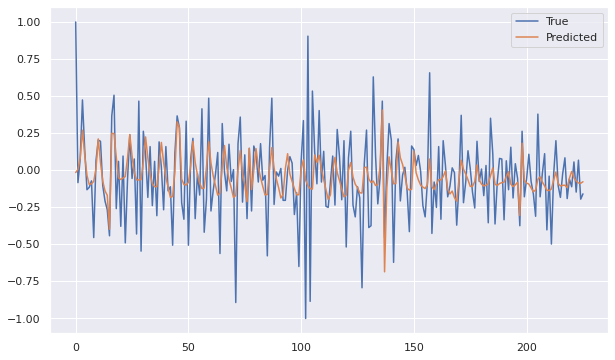

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_y, label=True)
plt.plot(y_pred_scaled, label='Predicted')
plt.legend()
plt.show();


In [ ]:
y_pred_scaled

array([[-0.015746],
       [ 0.004745],
       [ 0.081415],
       [ 0.269722],
       ...,
       [-0.072932],
       [-0.086177],
       [-0.087894],
       [-0.0777  ]], dtype=float32)

In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [ ]:
residuals = y - y_pred

In [ ]:
np.mean(abs(residuals))

59.94369253199012

##NN MODEL WITH SEASONAL FEATURES


In [ ]:
from fastai.tabular import add_datepart
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.callbacks import EarlyStopping

In [ ]:
diffeddata = googleanalyticsdata.diff(1)[1:]
diffeddata['date'] = diffeddata.index

In [ ]:
add_datepart(diffeddata, 'date')

,Users,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
Day Index,,,,,,,,,,,,,,
2019-08-16,263.0,2019,8,33,16,4,228,False,False,False,False,False,False,1565913600
2019-08-17,-9.0,2019,8,33,17,5,229,False,False,False,False,False,False,1566000000
2019-08-18,31.0,2019,8,33,18,6,230,False,False,False,False,False,False,1566086400
2019-08-19,131.0,2019,8,34,19,0,231,False,False,False,False,False,False,1566172800
2019-08-20,47.0,2019,8,34,20,1,232,False,False,False,False,False,False,1566259200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-24,26.0,2020,3,13,24,1,84,False,False,False,False,False,False,1585008000
2020-03-25,-25.0,2020,3,13,25,2,85,False,False,False,False,False,False,1585094400
2020-03-26,29.0,2020,3,13,26,3,86,False,False,False,False,False,False,1585180800


In [ ]:
diffeddata = diffeddata.replace(to_replace=True, value=1)

In [ ]:
diffeddata['Is_month_end'].describe()

count    226.000000
mean       0.030973
std        0.173630
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: Is_month_end, dtype: float64

In [ ]:
values = diffeddata.values

In [ ]:
print(values)

[[ 2.630000e+02  2.019000e+03  8.000000e+00  3.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.565914e+09]
 [-9.000000e+00  2.019000e+03  8.000000e+00  3.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.566000e+09]
 [ 3.100000e+01  2.019000e+03  8.000000e+00  3.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.566086e+09]
 [ 1.310000e+02  2.019000e+03  8.000000e+00  3.400000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.566173e+09]
 ...
 [-2.500000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585094e+09]
 [ 2.900000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585181e+09]
 [-3.700000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585267e+09]
 [-2.800000e+01  2.020000e+03  3.000000e+00  1.300000e+01 ...  0.000000e+00  0.000000e+00  0.000000e+00  1.585354e+09]]


In [ ]:
y = values[:,0]

In [ ]:
print(y)

[263.  -9.  31. 131. ... -25.  29. -37. -28.]


In [ ]:
scaler_y = MinMaxScaler(feature_range=(-1,1))
scaled_y = scaler_y.fit_transform(y.reshape(-1,1))

In [ ]:
scaled_y.shape

(226, 1)

In [ ]:
X = values[:,1:]

In [ ]:
X

array([[2.019000e+03, 8.000000e+00, 3.300000e+01, 1.600000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.565914e+09],
       [2.019000e+03, 8.000000e+00, 3.300000e+01, 1.700000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.566000e+09],
       [2.019000e+03, 8.000000e+00, 3.300000e+01, 1.800000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.566086e+09],
       [2.019000e+03, 8.000000e+00, 3.400000e+01, 1.900000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.566173e+09],
       ...,
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 2.500000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.585094e+09],
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 2.600000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.585181e+09],
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 2.700000e+01, ..., 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.585267e+09],
       [2.020000e+03, 3.000000e+00, 1.300000e+01, 

In [ ]:
scaler_X = MinMaxScaler(feature_range=(-1,1))
scaled_X = scaler_X.fit_transform(X)

In [ ]:
scaled_X

array([[-1.      ,  0.272727,  0.254902,  0.      , ..., -1.      , -1.      , -1.      , -1.      ],
       [-1.      ,  0.272727,  0.254902,  0.066667, ..., -1.      , -1.      , -1.      , -0.991111],
       [-1.      ,  0.272727,  0.254902,  0.133333, ..., -1.      , -1.      , -1.      , -0.982222],
       [-1.      ,  0.272727,  0.294118,  0.2     , ..., -1.      , -1.      , -1.      , -0.973333],
       ...,
       [ 1.      , -0.636364, -0.529412,  0.6     , ..., -1.      , -1.      , -1.      ,  0.973333],
       [ 1.      , -0.636364, -0.529412,  0.666667, ..., -1.      , -1.      , -1.      ,  0.982222],
       [ 1.      , -0.636364, -0.529412,  0.733333, ..., -1.      , -1.      , -1.      ,  0.991111],
       [ 1.      , -0.636364, -0.529412,  0.8     , ..., -1.      , -1.      , -1.      ,  1.      ]])

##NN Model with seasonal feautures

In [ ]:
nn_model = Sequential()
nn_model.add(Dense(26, input_dim=13, activation='relu'))
#nn_model.add(Dense(52, input_dim=26, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)

In [ ]:
history = nn_model.fit(scaled_X, scaled_y, epochs=100,
                       batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/100
226/226 [==============================] - 1s 3ms/step - loss: 0.1488
Epoch 2/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0903
Epoch 3/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0860
Epoch 4/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0840
Epoch 5/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0822
Epoch 6/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0807
Epoch 7/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0798
Epoch 8/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0792
Epoch 9/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0786
Epoch 10/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0780
Epoch 11/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0776
Epoch 12/100
226/226 [==============================] - 1s 3ms/step - loss: 0.0773
Epoch 13/100


In [ ]:
y_pred_scaled = nn_model.predict(scaled_X)

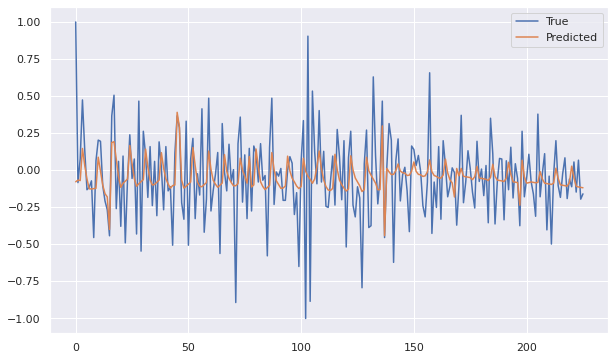

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_y, label=True)
plt.plot(y_pred_scaled, label='Predicted')
plt.legend()
plt.show();


In [ ]:
y_pred_scaled

array([[-0.078148],
       [-0.066562],
       [-0.069737],
       [ 0.146762],
       ...,
       [-0.10873 ],
       [-0.112887],
       [-0.115671],
       [-0.118361]], dtype=float32)

In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [ ]:
residuals = y - y_pred

In [ ]:
np.mean(abs(residuals))

58.01336327317234

In [ ]:
print(residuals)

[[270.615139  -1.384861  38.615139 138.615139 ... -17.384861  36.615139 -29.384861 -20.384861]
 [267.707118  -4.292882  35.707118 135.707118 ... -20.292882  33.707118 -32.292882 -23.292882]
 [268.503954  -3.496046  36.503954 136.503954 ... -19.496046  34.503954 -31.496046 -22.496046]
 [214.162853 -57.837147 -17.837147  82.162853 ... -73.837147 -19.837147 -85.837147 -76.837147]
 ...
 [278.291163   6.291163  46.291163 146.291163 ...  -9.708837  44.291163 -21.708837 -12.708837]
 [279.334738   7.334738  47.334738 147.334738 ...  -8.665262  45.334738 -20.665262 -11.665262]
 [280.033545   8.033545  48.033545 148.033545 ...  -7.966455  46.033545 -19.966455 -10.966455]
 [280.708546   8.708546  48.708546 148.708546 ...  -7.291454  46.708546 -19.291454 -10.291454]]


In [ ]:
np.mean(abs(residuals))

58.01336327317234

##LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
generator = TimeseriesGenerator(scaled_X, scaled_y, length=1,
                                sampling_rate=1, batch_size=3)

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(2, activation='relu', input_shape=(1, scaled_X.shape[1])))
#nn_model.add(Dense(52, input_dim=26, activation='relu'))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(monitor='loss', patience=2, verbose=1)
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 2)                 128       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 3         
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
lstm_model.fit_generator(generator,epochs=100)

Epoch 1/100
75/75 [==============================] - 1s 13ms/step - loss: 0.0858
Epoch 2/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0809
Epoch 3/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0796
Epoch 4/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0790
Epoch 5/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0785
Epoch 6/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0782
Epoch 7/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0778
Epoch 8/100
75/75 [==============================] - 1s 9ms/step - loss: 0.0775
Epoch 9/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0772
Epoch 10/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0771
Epoch 11/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0769
Epoch 12/100
75/75 [==============================] - 1s 8ms/step - loss: 0.0766
Epoch 13/100
75/75 [================

In [ ]:
y_pred_scaled = lstm_model.predict(generator)

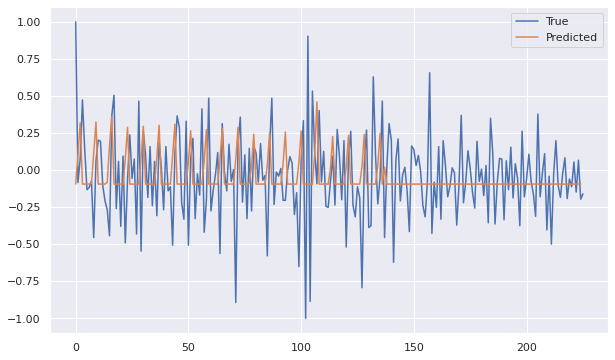

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_y, label=True)
plt.plot(y_pred_scaled, label='Predicted')
plt.legend()
plt.show();

In [ ]:
y_pred_scaled

array([[-0.09353 ],
       [ 0.106203],
       [ 0.319247],
       [-0.09353 ],
       ...,
       [-0.09353 ],
       [-0.09353 ],
       [-0.09353 ],
       [-0.09353 ]], dtype=float32)

In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_scaled)

In [ ]:
residuals = y - y_pred

In [ ]:
np.mean(abs(residuals))

59.653734746912356

##Out of Sample Test